# Airline Analysis

In this project, we'll imagine that we work for a travel agency and need to know the ins and outs of airline prices for our clients. we want to make sure that we can find the best deal for our client and help them to understand how airline prices change based on different factors.

We decide to look into our favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, we'll explore the dataset and get to know each of these features. 

** Note: The dataset was provided by Codeacademy **

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


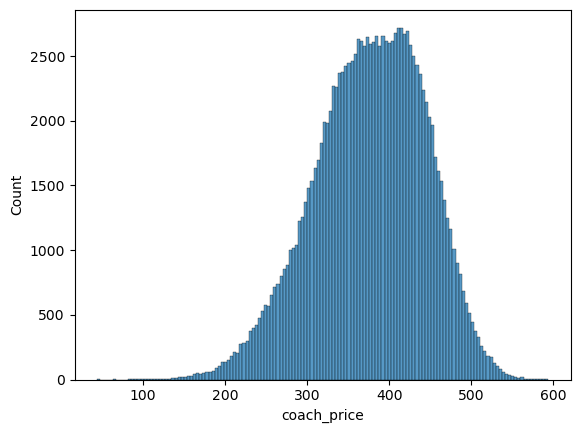

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

sns.histplot(flight.coach_price)
plt.show()

In [14]:
## Task 1
from statistics import mean

coach_min = min(flight["coach_price"])
coach_max = max(flight["coach_price"])
coach_avg = mean(flight["coach_price"])

print(f"The cheapest price is {coach_min:.2f} and the most expansive one is {coach_max:.2f}, while the mean is {coach_avg:.2f}")

The cheapest price is 44.41 and the most expansive one is 593.63, while the mean is 376.59


$500 seems a bit expansive for the coach price. 

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [91]:
## Task 2
only_8hr = flight[flight["hours"] == 8]

coach_min_8 = min(only_8hr["coach_price"])
coach_max_8 = max(only_8hr["coach_price"])
coach_avg_8 = mean(only_8hr["coach_price"])

print(f"Average coach price is {coach_avg_8:.2f}, while low and high are {coach_min_8:.2f} & {coach_max_8:.2f} respectively for a flights which are 8 hrs")

Average coach price is 431.83, while low and high are 170.77 & 593.63 respectively for a flights which are 8 hrs


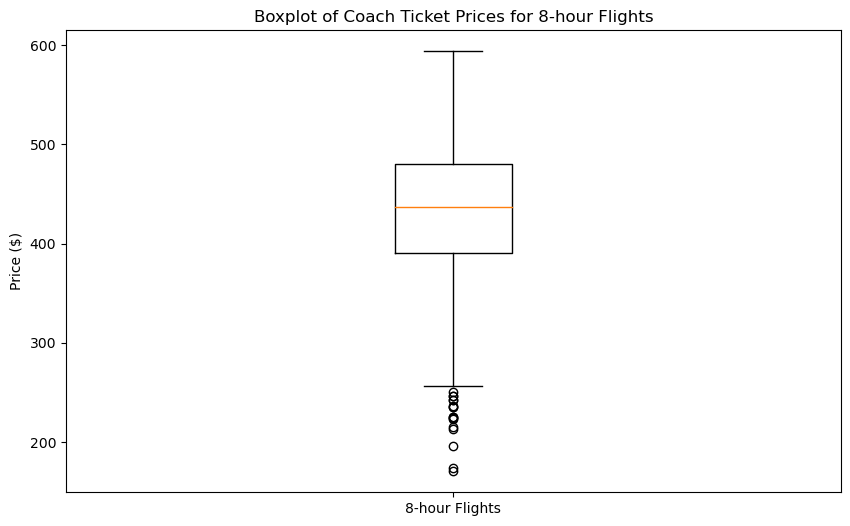

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(only_8hr['coach_price'])
plt.title('Boxplot of Coach Ticket Prices for 8-hour Flights')
plt.ylabel('Price ($)')
plt.xticks([1], ['8-hour Flights'])
plt.show()


431.834377372817
437.115


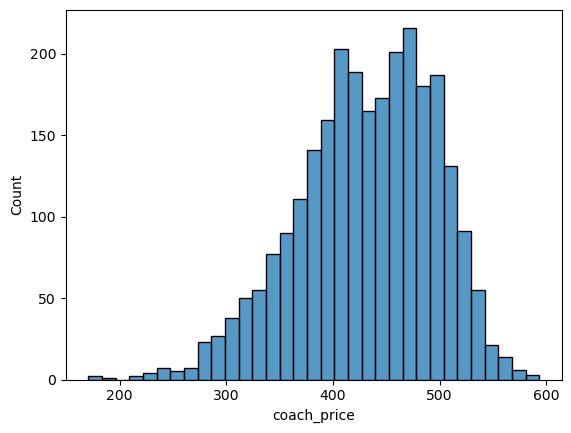

In [87]:
## Task 2
print(np.mean(flight.coach_price[flight.hours == 8]))
print(np.median(flight.coach_price[flight.hours == 8]))

sns.histplot(flight.coach_price[flight.hours == 8])

plt.show()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [26]:
## Task 3

print("Summary Statistics for 'delay'")
print(flight['delay'].describe())


Summary Statistics for 'delay'
count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64



take-off delay time is in minutes. The average delay is 13.16 minutes but the highest delay is 26 hours. 

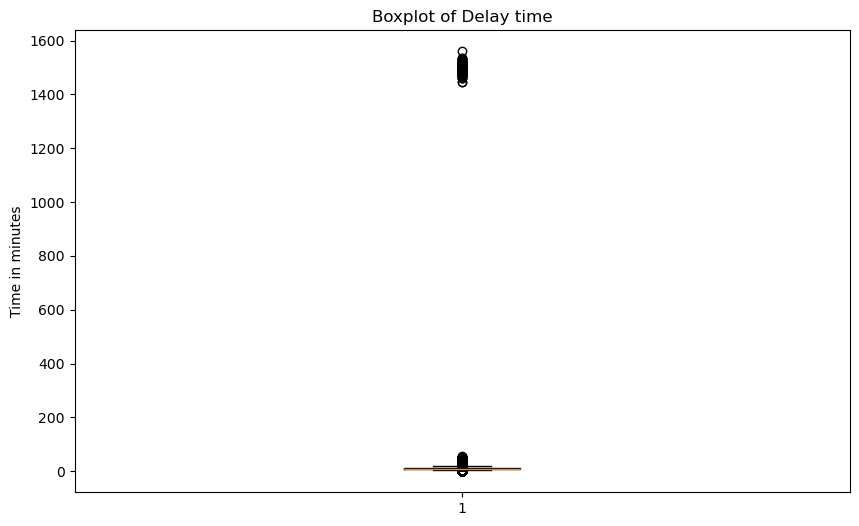

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(flight['delay'])
plt.title('Boxplot of Delay time')
plt.ylabel('Time in minutes')

plt.show()


There are clearly a lot of outliers in the dataset but we still need to understand the large delay times in the dataset. So, let's look at the distribution instead. 

(array([1.0515e+04, 2.1530e+04, 6.4855e+04, 1.3000e+04, 3.7050e+03,
        4.4960e+03, 5.5870e+03, 3.1020e+03, 1.7530e+03, 8.6100e+02,
        2.1600e+02, 4.9000e+01, 1.0000e+01, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

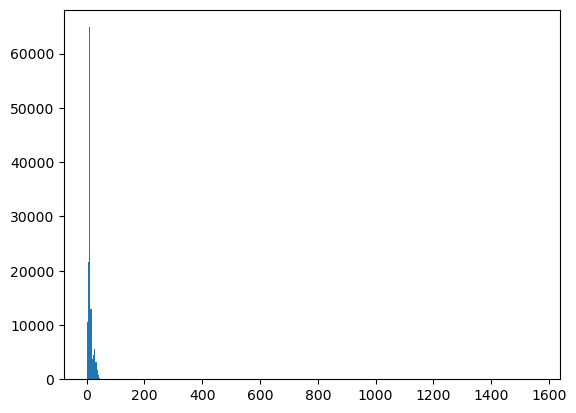

In [95]:
import matplotlib.pyplot as plt
plt.hist(flight["delay"], bins=360)

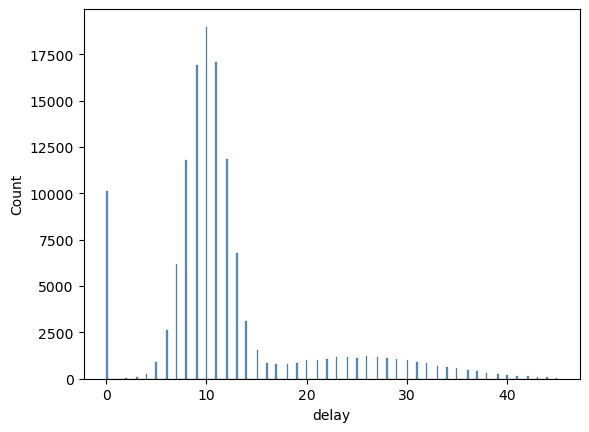

In [97]:
sns.histplot(flight.delay[flight.delay <= 45])
plt.show()

In [56]:
len(flight[flight["delay"] > 45])

240

#### Comments
There were 240 out of 129780 occasions where the flight was delayed by more than 45 minutes.  Let's create categories to understand the delay types.

In [52]:
# Example in Python
delay_categories = ['Short Delay', 'Medium Delay', 'Long Delay']
flight['Delay_Category'] = pd.cut(flight['delay'], bins=[-1, 15, 45, float('inf')], labels=delay_categories)

print(flight['Delay_Category'].value_counts())


Delay_Category
Short Delay     108294
Medium Delay     21246
Long Delay         240
Name: count, dtype: int64


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

In [59]:
## Task 4
# let's Check for missing values
print(flight[['coach_price', 'firstclass_price']].isnull().sum())

# Now Let's look at the correlation between coach and first class prices
correlation_matrix = flight[['coach_price', 'firstclass_price']].corr()
correlation_coefficient = correlation_matrix.loc['coach_price', 'firstclass_price']
print(f"The Pearson correlation coefficient between coach and first-class prices is {correlation_coefficient:.2f}")


coach_price         0
firstclass_price    0
dtype: int64
The Pearson correlation coefficient between coach and first-class prices is 0.76


since it is a value close to 1 indicates a strong positive relationship. 

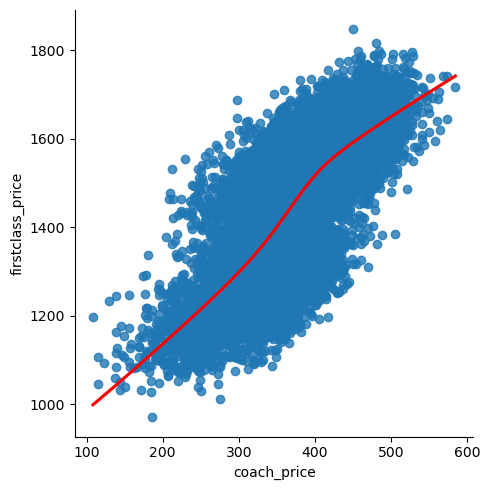

In [99]:
## Task 4
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'red'}, lowess=True)
plt.show()

In [63]:
# RATIO
# Compute the ratio
flight['price_ratio'] = flight['firstclass_price'] / flight['coach_price']

# Display some records to verify
print(flight[['coach_price', 'firstclass_price', 'price_ratio']].head())

   coach_price  firstclass_price  price_ratio
0      338.820           1571.02     4.636739
1      472.655           1663.70     3.519904
2      351.960           1429.86     4.062564
3      387.835           1558.76     4.019132
4      374.735           1245.58     3.323896


In [67]:
# Summary statistics
print("Summary Statistics for 'price_ratio'")
print(flight['price_ratio'].describe())


Summary Statistics for 'price_ratio'
count    129780.000000
mean          3.943179
std           0.569170
min           2.570758
25%           3.570408
50%           3.832873
75%           4.188998
max          21.597433
Name: price_ratio, dtype: float64


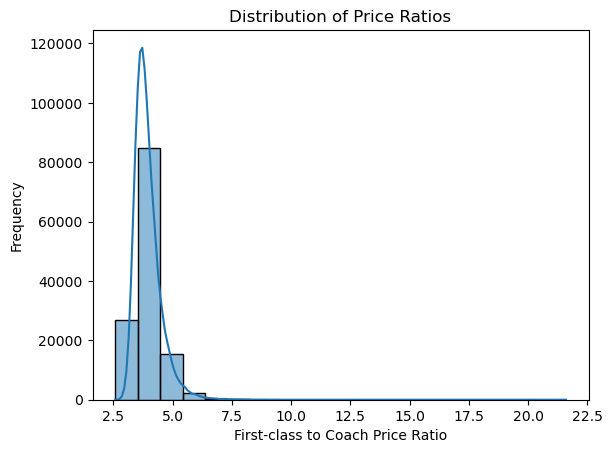

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(flight['price_ratio'], bins=20, kde=True)
plt.title('Distribution of Price Ratios')
plt.xlabel('First-class to Coach Price Ratio')
plt.ylabel('Frequency')
plt.show()

It can be seen that the ratio was uniformly distributed between 2.5 and 7.5, also a long tail due to outliers.

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

In [69]:
## Task 5
# Convert categorical features to numerical using one-hot encoding
encoded_data = pd.get_dummies(flight[['inflight_meal', 'inflight_entertainment', 'inflight_wifi']], drop_first=True)

# Concatenate the one-hot encoded columns and coach prices
analytical_data = pd.concat([flight['coach_price'], encoded_data], axis=1)

# Compute the correlation matrix
correlation_matrix = analytical_data.corr()

# Extract correlations related to 'coach_price'
feature_correlations = correlation_matrix.loc['coach_price'].drop('coach_price')
print(f"Correlations with Coach Price:\n{feature_correlations}")


Correlations with Coach Price:
inflight_meal_Yes             0.130679
inflight_entertainment_Yes    0.412481
inflight_wifi_Yes             0.312437
Name: coach_price, dtype: float64


### Comments
1. **inflight_meal_Yes: 0.130679**
Meaning: There's a relatively weak positive correlation between the presence of an inflight meal and the coach price.
Implication: Flights that offer an inflight meal are, on average, priced slightly higher than those that do not, but the correlation is weak, suggesting other factors are likely more influential in determining the price.
2. **inflight_entertainment_Yes: 0.412481**
Meaning: There's a moderate positive correlation between the presence of inflight entertainment and the coach price.
Implication: Flights that offer inflight entertainment tend to have higher coach prices. The presence of inflight entertainment is a stronger predictor of higher prices compared to inflight meals.
3. **inflight_wifi_Yes: 0.312437**
Meaning: There's a low-to-moderate positive correlation between the presence of inflight WiFi and the coach price.
Implication: Flights that offer inflight WiFi are generally priced higher than those that do not. The effect is stronger than for inflight meals but weaker than for inflight entertainment.

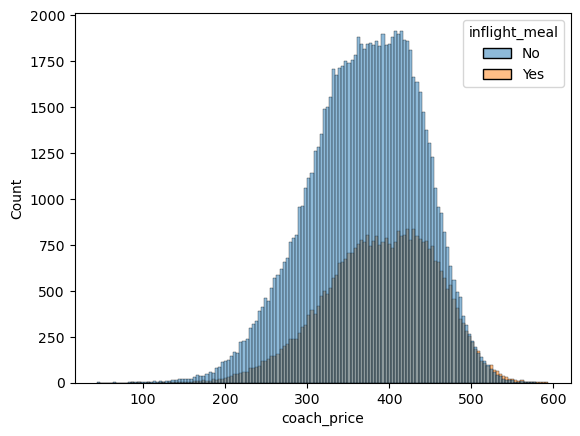

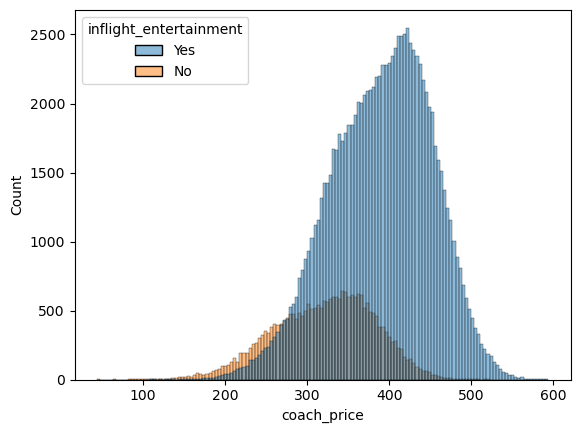

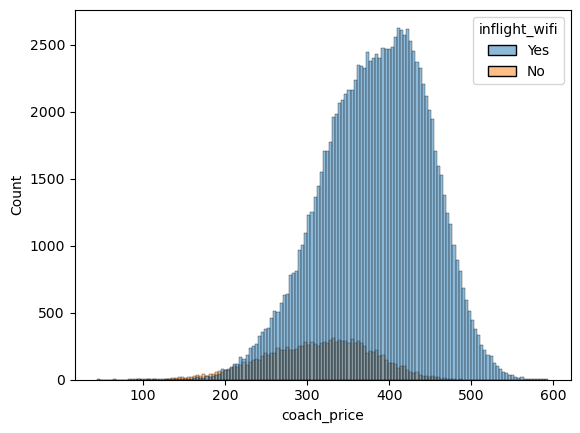

<Figure size 640x480 with 0 Axes>

In [100]:

## Task 5
# Inflight Meals
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()

# Inflight Entertainment
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

# Inflight WiFi
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()

6. How does the number of passengers change in relation to the length of flights?

In [72]:
## Task 6
#prelim analysis
print(flight[['hours', 'passengers']].describe())




               hours     passengers
count  129780.000000  129780.000000
mean        3.631214     207.723155
std         1.739118      12.776363
min         1.000000     135.000000
25%         2.000000     204.000000
50%         4.000000     210.000000
75%         4.000000     215.000000
max         8.000000     244.000000


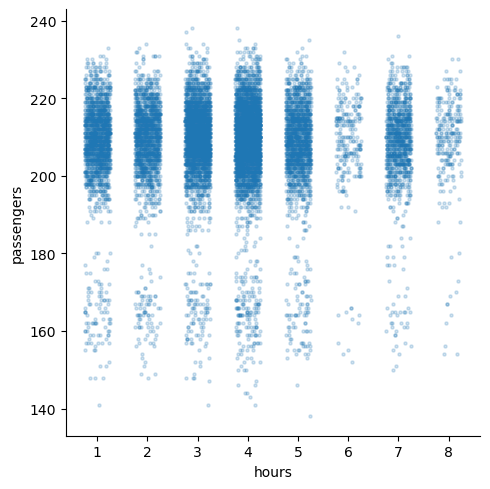

<Figure size 640x480 with 0 Axes>

In [101]:
## Task 6
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

In [74]:
correlation = flight[['hours', 'passengers']].corr().iloc[0, 1]
print(f"Correlation between flight duration (hours) and passengers: {correlation}")

Correlation between flight duration (hours) and passengers: -0.003933261130375811


### Regression Analysis

In [76]:
import statsmodels.api as sm

X = sm.add_constant(flight['hours'])
y = flight['passengers']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             passengers   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.008
Date:                Sat, 26 Aug 2023   Prob (F-statistic):              0.156
Time:                        11:45:17   Log-Likelihood:            -5.1478e+05
No. Observations:              129780   AIC:                         1.030e+06
Df Residuals:                  129778   BIC:                         1.030e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.8281      0.082   2531.252      0.0

### Comments
**R-squared and Adjusted R-squared:**
Both R-squared and the adjusted R-squared are 0.000, which further confirms that the model does not explain the variance in the number of passengers. In practical terms, knowing the flight duration would not help you predict the number of passengers.\

**F-statistic and Prob (F-statistic):**
The F-statistic value is 2.008 and the corresponding p-value (Prob (F-statistic)) is 0.156, greater than the standard alpha level of 0.05. This suggests that the model is not statistically significant, meaning that the 'hours' variable is not a significant predictor for the number of passengers.\

**Coefficients:**
The constant (or intercept) is around 207.83, which would represent the number of passengers when the flight duration is zero. While it's not meaningful to consider a flight of zero hours, the intercept serves as a baseline for the model.
The coefficient for 'hours' is approximately -0.029, which means for every additional hour in flight duration, the model predicts a decrease of about 0.029 in the number of passengers. However, this coefficient is not statistically significant as the p-value is 0.156, which is greater than the 0.05 alpha level. \

**Durbin-Watson:**
The Durbin-Watson statistic is 2.000, which is a good indication that there is no autocorrelation in the dataset, affirming the model's validity in this respect.\

**Omnibus and Prob(Omnibus):**
The Omnibus test has a p-value of 0.000, which indicates that the residuals are not normally distributed.\

**Jarque-Bera (JB) and Prob(JB):**
The Jarque-Bera test also indicates that the residuals are not normally distributed, with a p-value of 0.00.

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

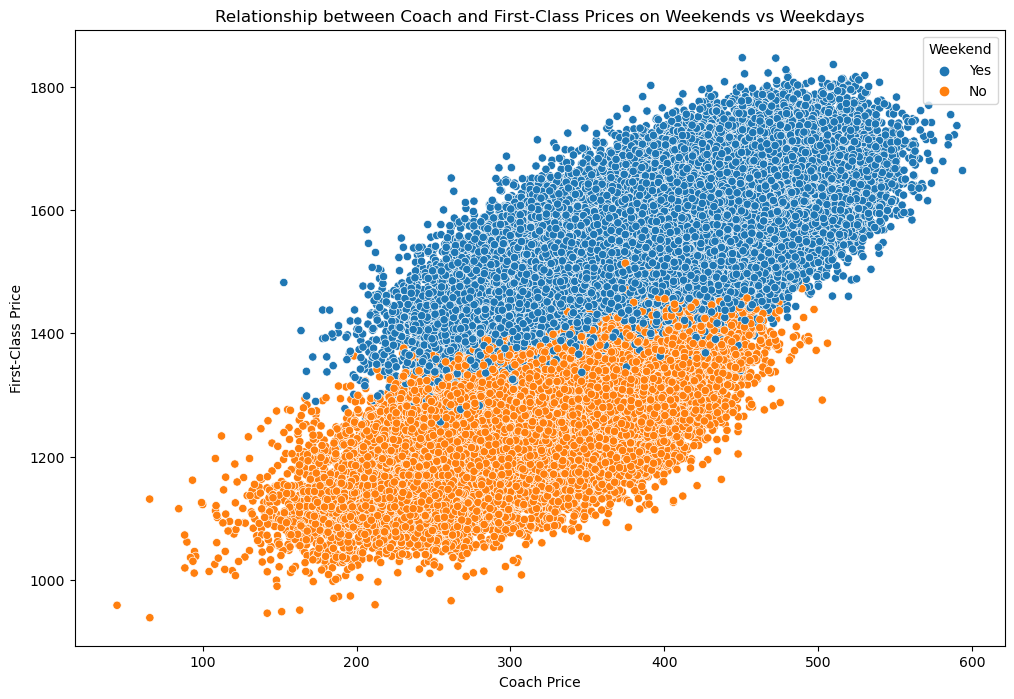

In [80]:
## Task 7


# Prepare data (creating a copy to avoid warning)
filtered_data = flight[['coach_price', 'firstclass_price', 'weekend']].copy()

# Convert 'weekend' to numeric (Yes = 1, No = 0)
filtered_data['weekend_numeric'] = filtered_data['weekend'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create interaction term
filtered_data['interaction'] = filtered_data['coach_price'] * filtered_data['weekend_numeric']

# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_data, x='coach_price', y='firstclass_price', hue='weekend')
plt.title('Relationship between Coach and First-Class Prices on Weekends vs Weekdays')
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')
plt.legend(title='Weekend', loc='upper right')
plt.show()


In [81]:


# Regression model
X = filtered_data[['coach_price', 'weekend_numeric', 'interaction']]
X = sm.add_constant(X)
y = filtered_data['firstclass_price']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       firstclass_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 2.730e+05
Date:                Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:55:08   Log-Likelihood:            -7.1580e+05
No. Observations:              129780   AIC:                         1.432e+06
Df Residuals:                  129776   BIC:                         1.432e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             974.7557      1.699    5

### Comments

**R-squared and Adjusted R-squared**
The R2 value of 0.863 suggests that approximately 86.3% of the variability in first-class prices can be explained by the model.
The adjusted R2 value also being 0.863 indicates that all predictor variables are relevant to the model, and there is minimal risk of overfitting.

**F-statistic and Prob (F-statistic)**
The F-statistic is a measure of how well the independent variables as a group explain the variation in the dependent variable. A higher F-statistic usually indicates a more useful model.
The Prob (F-statistic) close to 0.00 indicates that the model is statistically significant.

**Coefficients**

**const**: The constant term of 974.7557 suggests that if all predictor variables are zero, the first-class ticket price would be approximately \\$974.76.
**coach_price**: The coefficient of 0.8827 means that for every \\$1 increase in the coach ticket price, the first-class price would increase by approximately \\$0.88, holding all other variables constant.
**weekend_numeric**: The coefficient of 230.0586 suggests that the first-class price is approximately \\$230.06 higher on weekends compared to weekdays, holding other variables constant.
**interaction**: The coefficient of -0.0087 means that the effect of weekend_numeric on firstclass_price diminishes by this value as coach_price increases. However, the p-value for this coefficient is 0.177, indicating that it is not statistically significant at a 0.05 significance level.

**Omnibus and Prob(Omnibus)**
These are tests for the distribution of residuals. An Omnibus value close to zero and a Prob(Omnibus) close to 1 would indicate normally distributed residuals. Here, the value suggests that the residuals are not perfectly normally distributed.

**Jarque-Bera (JB) and Prob(JB)**
These are another set of tests for the normality of residuals. Similar to the Omnibus test, the Jarque-Bera test suggests that the residuals are not perfectly normally distributed.

**Durbin-Watson**
The Durbin-Watson statistic tests for autocorrelation in the residuals. A value close to 2 (such as 1.996) suggests that there is no autocorrelation.

**Summary**
In summary, the model appears to be well-fitted to explain the variability in first-class prices, although potential issues such as non-normally distributed residuals and multicollinearity could be further examined for robustness.

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

In [82]:
## Task 8

#Data filtering
redeye_data = flight[flight['redeye'] == 'Yes']
non_redeye_data = flight[flight['redeye'] == 'No']

#descriptive statistics
grouped_redeye = redeye_data.groupby('day_of_week')['coach_price'].describe()
grouped_non_redeye = non_redeye_data.groupby('day_of_week')['coach_price'].describe()

print("Redeye Flights:")
print(grouped_redeye)

print("\nNon-Redeye Flights:")
print(grouped_non_redeye)


Redeye Flights:
              count        mean        std      min        25%       50%  \
day_of_week                                                                
Friday       1159.0  337.155928  50.949138  178.050  304.95250  342.1650   
Monday        663.0  258.335271  55.148240   44.415  225.90750  262.3600   
Saturday     1720.0  347.454782  51.783982  177.965  313.94625  351.9450   
Sunday       1418.0  339.015085  51.152904  152.745  306.36625  343.9075   
Thursday      391.0  261.606944  48.646271  142.460  228.87000  263.2750   
Tuesday       558.0  262.127115  52.374627   65.720  231.13500  267.0375   
Wednesday     537.0  257.725428  55.332382   92.140  224.86500  260.7200   

                   75%      max  
day_of_week                      
Friday       373.25000  491.145  
Monday       296.02000  388.435  
Saturday     384.72750  494.800  
Sunday       374.64500  506.020  
Thursday     295.95000  375.690  
Tuesday      296.25625  416.680  
Wednesday    297.56500  393

**Redeye Flights:**

The highest mean coach price for redeye flights occurs on Saturday at approximately \\$347.45, with the lowest on Monday at around \\$258.34.
The standard deviation suggests a relatively higher variability in coach prices on Monday and Wednesday.

**Non-Redeye Flights:**

The highest mean coach price for non-redeye flights is also on Saturday at approximately \\$415.46, with the lowest on Monday at around \\$325.12.
Again, the standard deviation shows the variability in prices, but it's relatively stable across days of the week for non-redeye flights.

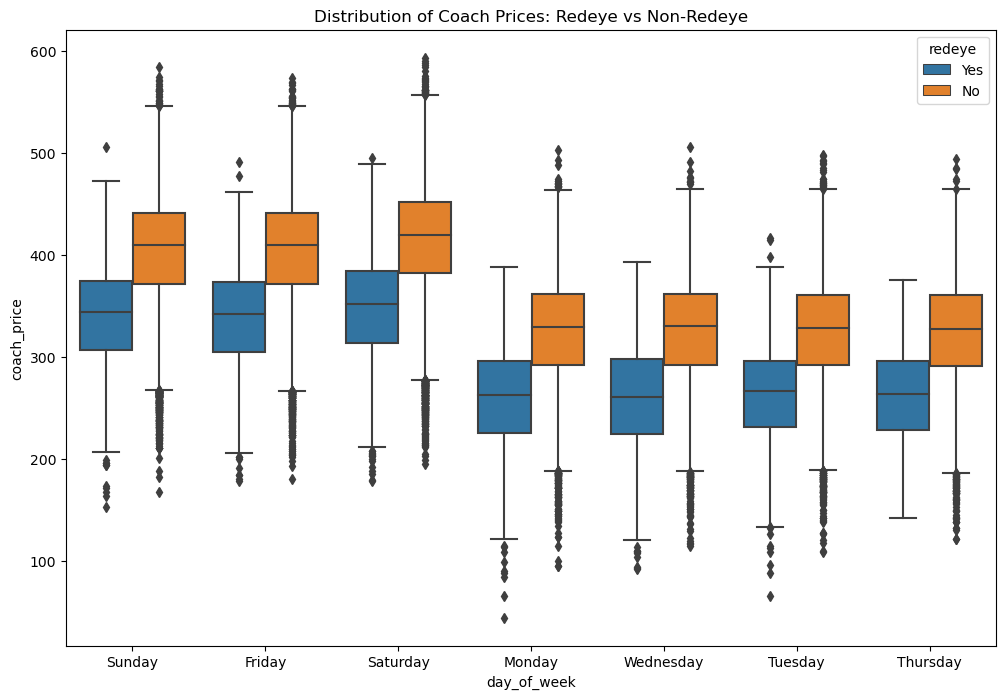

In [83]:
# Boxplot to compare coach prices for redeye vs. non-redeye flights for each day
plt.figure(figsize=(12, 8))
sns.boxplot(x='day_of_week', y='coach_price', hue='redeye', data=flight)
plt.title('Distribution of Coach Prices: Redeye vs Non-Redeye')
plt.show()

In [85]:
from statsmodels.formula.api import ols

# Converted 'day_of_week' to categorical type just in case if it isn't
flight['day_of_week'] = flight['day_of_week'].astype('category')

# ANOVA
formula = 'coach_price ~ day_of_week * redeye'
model = ols(formula, data=flight).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            coach_price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     6629.
Date:                Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:10:25   Log-Likelihood:            -6.9822e+05
No. Observations:              129780   AIC:                         1.396e+06
Df Residuals:                  129766   BIC:                         1.397e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Comments 
**Model Quality:**
R-squared is 0.399, suggesting that approximately 40% of the variability in coach prices can be explained by the model.

**Coefficients:**
The base case (Intercept) is Friday for non-redeye flights with a coach price of approximately \\$405.
Monday flights are on average \\$79.88 cheaper than Friday flights.
Saturday flights are on average \\$10.46 more expensive than Friday flights.
The coefficients for other days are not significantly different from Friday.
Redeye flights are on average \\$67.85 cheaper than non-redeye flights.

**Interaction Terms:**
The interaction terms mostly have p-values higher than 0.05, which suggests that the effect of being a redeye flight does not significantly differ across the days of the week.

**Statistical Significance:**
Almost all main effects and some interaction effects are statistically significant (P>|t| < 0.05) except for the interaction of Sunday and redeye, which is not statistically significant (P>|t| = 0.462).

**Multicollinearity and Other Concerns:**
The Condition Number of 34.4 suggests that multicollinearity is probably not a concern in this model.


**Summary**
In summary, both the day of the week and redeye status significantly impact coach prices. Redeye flights are generally cheaper, and there is a clear fluctuation in prices depending on the day of the week. However, the impact of being a redeye flight does not significantly differ across the days, suggesting that the redeye status has a general effect on lowering the coach price irrespective of the day of the week.

# Key Insights from the Analysis

**First-Class Flights:**

- Coach prices were found to be a significant predictor of first-class prices.
- The weekend variable indicated that flying on the weekend is associated with a higher first-class price.
- The interaction term was not statistically significant, indicating that the relationship between coach prices and weekends is not significantly different for determining first-class prices.

**Coach Flights:**

- The day of the week has a clear influence on the coach prices, with Monday flights generally being cheaper.
- Redeye status significantly influences coach prices, with redeye flights generally cheaper than non-redeye flights.
- Interaction terms between redeye status and the day of the week were largely not statistically significant, meaning redeye flights don't exhibit a day-specific pricing trend.

**Implications**
- For airlines: Understanding these predictors can aid in yield management strategies. For example, airlines could consider specific promotions for first-class upgrades during the weekdays or offer special discounts for coach seats on specific days to optimize seat allocation.

- For consumers: The best deals for first-class seats could likely be found on weekdays. For coach, non-redeye flights on Mondays might offer the most cost-effective option.

**Limitations**
The models, despite their robustness in certain areas, do not account for all possible factors affecting prices, such as holidays, seasonality, or external economic conditions.


**Future work**
- Expanding the dataset to include other variables like holidays, advance booking period, and layover duration might add depth to the analysis.
- Conducting a separate time-series analysis may reveal temporal trends in airfare, which are not captured in a cross-sectional regression model.


**Conclusion** 
In conclusion, both first-class and coach prices exhibit distinct patterns influenced by a set of factors, including the day of the week, redeye status, and in the case of first-class, the price of coach tickets. Understanding these factors can lead to more informed decisions for both airlines and consumers alike.